In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#  PARTE 1 — ANÁLISIS EXPLORATORIO DE DATOS (EDA)

El objetivo de esta sección es comprender en profundidad la estructura, calidad y características estadísticas del dataset **Credit Card Fraud Detection**, con el fin de preparar los datos para las etapas posteriores del proyecto: modelado, explicabilidad y visualización de representaciones internas.

El resultado de este análisis será un dataset limpio, consistente y documentado, sobre el cual se construirán los modelos de detección de fraude y las técnicas de explicabilidad (SHAP y UMAP) en las siguientes fases del proyecto.



### 1.1 Carga de datos

In [76]:
df = pd.read_csv("creditcard.csv")
display(df.head())

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### 1.2 Chequeos de calidad del dataset

#### 1.2.1 Verificar columnas y tipos de datos

In [77]:
print("Columnas del dataset:")
print(df.columns.tolist())
print(f"\nNúmero total de columnas: {len(df.columns)}")

print("\nTipos de datos por columna:")
print(df.dtypes)

Columnas del dataset:
['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']

Número total de columnas: 31

Tipos de datos por columna:
Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object


#### 1.2.3 Valores faltantes (NaN)

In [78]:
print("Valores faltantes por columna:")
print(df.isnull().sum())

total_missing = df.isnull().sum().sum()
print(total_missing)

Valores faltantes por columna:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64
0


#### 1.2.4 Valores Infinitos

In [79]:
infinite_values = np.isinf(df).sum()
print("Valores infinitos por columna:")
print(infinite_values)

Valores infinitos por columna:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


#### 1.2.5 Filas duplicadas

In [80]:
duplicados = df.duplicated().sum()
print(f"Filas duplicadas encontradas: {duplicados}")

Filas duplicadas encontradas: 1081


### 1.3 Estadistica descriptiva

#### 1.3.1 Resumen estadistico general

In [81]:
print("Resumen estadístico de las variables numéricas:\n")
print(df.describe().T)

Resumen estadístico de las variables numéricas:

           count          mean           std         min           25%  \
Time    284807.0  9.481386e+04  47488.145955    0.000000  54201.500000   
V1      284807.0  1.168375e-15      1.958696  -56.407510     -0.920373   
V2      284807.0  3.416908e-16      1.651309  -72.715728     -0.598550   
V3      284807.0 -1.379537e-15      1.516255  -48.325589     -0.890365   
V4      284807.0  2.074095e-15      1.415869   -5.683171     -0.848640   
V5      284807.0  9.604066e-16      1.380247 -113.743307     -0.691597   
V6      284807.0  1.487313e-15      1.332271  -26.160506     -0.768296   
V7      284807.0 -5.556467e-16      1.237094  -43.557242     -0.554076   
V8      284807.0  1.213481e-16      1.194353  -73.216718     -0.208630   
V9      284807.0 -2.406331e-15      1.098632  -13.434066     -0.643098   
V10     284807.0  2.239053e-15      1.088850  -24.588262     -0.535426   
V11     284807.0  1.673327e-15      1.020713   -4.797473     -0

#### 1.3.2 Verificacion negativos en "Amount"


In [82]:
negativos = (df['Amount'] < 0).sum()
print(f"Cantidad de montos negativos: {negativos}")

Cantidad de montos negativos: 0



###  Columnas principales
| Variable | Descripción | Interpretación / Rango |
|-----------|-------------|------------------------|
| `Time` | Segundos desde la primera transacción | ~0 a ~172,800 (≈48 h) |
| `V1`–`V28` | Componentes PCA anonimizados | Distribución centrada en 0 (sin significado individual) |
| `Amount` | Monto de la transacción | 0 a varios miles |
| `Class` | Etiqueta (0 = legítima, 1 = fraude) | Variable objetivo binaria |

El dataset es limpio y consistente. No requiere eliminación o imputación de valores.

Los duplicados se mantuvieron  para reproducir un flujo realista de captación continua de datos.

### 1.4 Analisis de desbalance de clases

#### 1.4.1 Conteo de clases

In [83]:
conteo_clases = df['Class'].value_counts()
print("Conteo de transacciones por clase:")
print(conteo_clases)

print("\nInterpretación:")
print(f"Clase 0 → Transacciones legítimas: {conteo_clases[0]:,}")
print(f"Clase 1 → Transacciones fraudulentas: {conteo_clases[1]:,}")

Conteo de transacciones por clase:
Class
0    284315
1       492
Name: count, dtype: int64

Interpretación:
Clase 0 → Transacciones legítimas: 284,315
Clase 1 → Transacciones fraudulentas: 492


#### 1.4.2 Porcentaje relativo de cada clase

In [84]:
porcentaje_clases = (df['Class'].value_counts(normalize=True) * 100).round(4)
print("Porcentaje de cada clase:")
print(porcentaje_clases)

Porcentaje de cada clase:
Class
0    99.8273
1     0.1727
Name: proportion, dtype: float64


El desbalance extremo implica que no podemos usar *accuracy* como métrica principal.  
Se requerirán métricas sensibles a la clase minoritaria, como *Recall*, *Precision*, *F1-score* y *AUC-ROC*.


#### 1.4.3 Visualizacion del desbalance

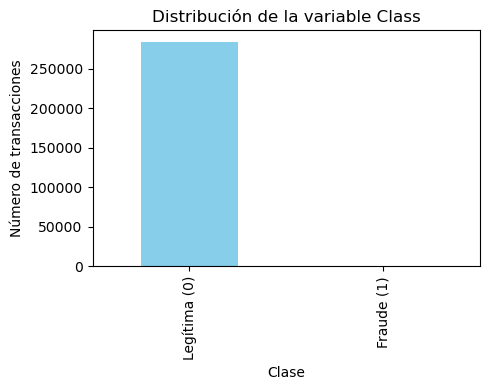

In [85]:
plt.figure(figsize=(5, 4))
df['Class'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribución de la variable Class')
plt.xticks([0, 1], ['Legítima (0)', 'Fraude (1)'])
plt.ylabel('Número de transacciones')
plt.xlabel('Clase')
plt.tight_layout()
plt.show()

### 1.5 Muestras rapidas del dataset

#### 1.5.1 Muestra aleatoria general

In [86]:
print("Muestra aleatoria de 5 filas del dataset:\n")
display(df.sample(5, random_state=42))

Muestra aleatoria de 5 filas del dataset:



,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
43428,41505.0,-16.526507,8.584972,-18.649853,9.505594,-13.793819,-2.832404,-16.701694,7.517344,-8.507059,...,1.190739,-1.127670,-2.358579,0.673461,-1.413700,-0.462762,-2.018575,-1.042804,364.19,1
49906,44261.0,0.339812,-2.743745,-0.134070,-1.385729,-1.451413,1.015887,-0.524379,0.224060,0.899746,...,-0.213436,-0.942525,-0.526819,-1.156992,0.311211,-0.746647,0.040996,0.102038,520.12,0
29474,35484.0,1.399590,-0.590701,0.168619,-1.029950,-0.539806,0.040444,-0.712567,0.002299,-0.971747,...,0.102398,0.168269,-0.166639,-0.810250,0.505083,-0.232340,0.011409,0.004634,31.00,0
276481,167123.0,-0.432071,1.647895,-1.669361,-0.349504,0.785785,-0.630647,0.276990,0.586025,-0.484715,...,0.358932,0.873663,-0.178642,-0.017171,-0.207392,-0.157756,-0.237386,0.001934,1.50,0
278846,168473.0,2.014160,-0.137394,-1.015839,0.327269,-0.182179,-0.956571,0.043241,-0.160746,0.363241,...,-0.238644,-0.616400,0.347045,0.061561,-0.360196,0.174730,-0.078043,-0.070571,0.89,0


#### 1.5.2 Muestra de transacciones fraudulentas

In [87]:
fraudes = df[df['Class'] == 1]
print(f"Total de transacciones fraudulentas: {len(fraudes):,}\n")

print("Ejemplos de transacciones fraudulentas (hasta 5):\n")
display(fraudes.sample(5, random_state=42))

Total de transacciones fraudulentas: 492

Ejemplos de transacciones fraudulentas (hasta 5):



,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
17407,28692.0,-29.200329,16.155701,-30.013712,6.476731,-21.225810,-4.902997,-19.791248,19.168327,-3.617242,...,1.809371,-2.175815,-1.365104,0.174286,2.103868,-0.209944,1.278681,0.372393,99.99,1
12369,21662.0,-18.018561,10.558600,-24.667741,11.786180,-10.564657,-2.645681,-18.023468,2.693655,-6.219464,...,-2.319479,0.908839,1.352904,-1.059222,0.185751,0.687037,2.078081,-1.429517,1.00,1
143333,85285.0,-7.030308,3.421991,-9.525072,5.270891,-4.024630,-2.865682,-6.989195,3.791551,-4.622730,...,1.103398,-0.541855,0.036943,-0.355519,0.353634,1.042458,1.359516,-0.272188,0.00,1
149357,91075.0,-1.855061,1.554964,-1.405809,0.669327,-0.280230,1.178652,-3.459979,-2.815155,1.242229,...,-0.095308,0.946629,-0.297403,-0.368344,0.198731,-0.078591,0.366709,0.073767,38.76,1
15225,26585.0,-19.856322,12.095893,-22.464083,6.115541,-15.148022,-4.346724,-15.648507,13.276805,-3.974162,...,1.750730,-1.409636,-0.809809,0.121397,1.350300,-0.224292,1.597621,0.476920,99.99,1


### 1.6 Visualizaciones exploratorias

#### 1.6.1 Boxplot de Amount por Class

C:\Users\usmon\AppData\Local\Temp\ipykernel_10180\4147830409.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


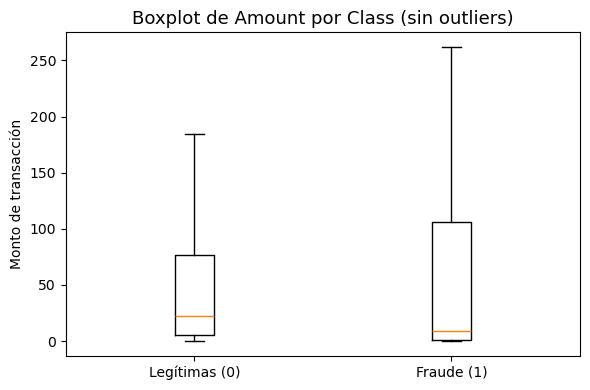

In [88]:
plt.figure(figsize=(6, 4))
plt.boxplot(
    [df.loc[df['Class'] == 0, 'Amount'], df.loc[df['Class'] == 1, 'Amount']],
    labels=['Legítimas (0)', 'Fraude (1)'],
    showfliers=False
)
plt.title("Boxplot de Amount por Class (sin outliers)", fontsize=13)
plt.ylabel("Monto de transacción")
plt.tight_layout()
plt.show()

#### Interpretacion:
El boxplot de Amount por clase muestra que las transacciones fraudulentas tienden a tener una mayor dispersión en los montos, alcanzando valores más altos que las transacciones legítimas.
Sin embargo, las medianas son similares, lo que indica que el monto no es un factor determinante por sí solo para identificar un fraude.

#### 1.6.2 Matriz de correlacion de Pearson

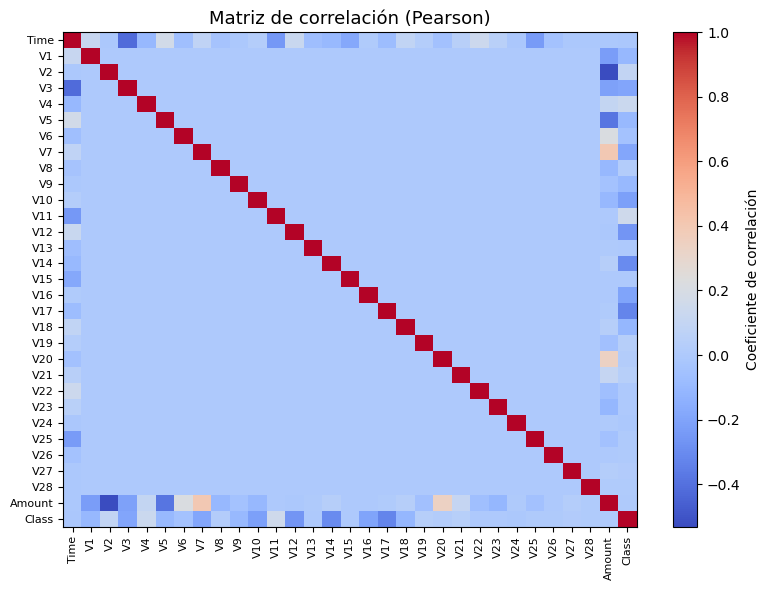

In [89]:
numeric_cols = df.select_dtypes(include=[np.number])
corr_matrix = numeric_cols.corr(method='pearson')

plt.figure(figsize=(8, 6))
plt.imshow(corr_matrix, cmap='coolwarm', aspect='auto')
plt.title("Matriz de correlación (Pearson)", fontsize=13)
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=90, fontsize=8)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns, fontsize=8)
plt.colorbar(label='Coeficiente de correlación')
plt.tight_layout()
plt.show()


#### Interpretacion
La matriz de correlación muestra que los componentes V1–V28 están prácticamente decorrelacionados entre sí, lo cual confirma la correcta aplicación del PCA.

#### 1.6.3 Grafico  de valores promedio (V1-V5) por clase

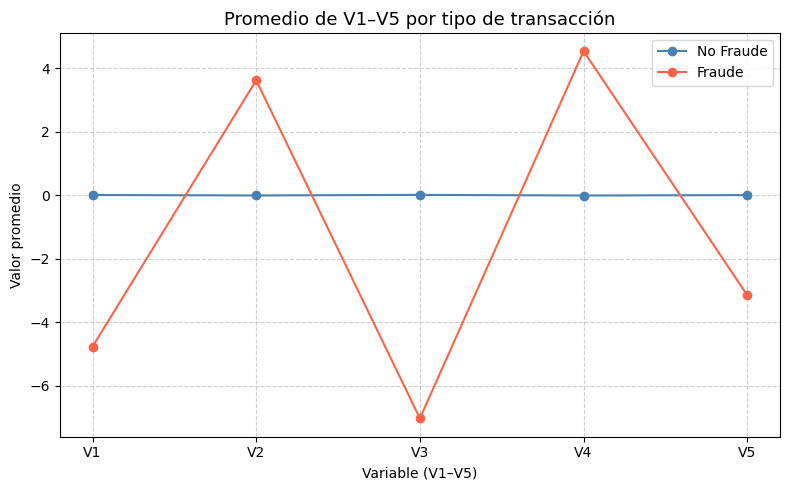

Valores promedio de cada variable:

    No Fraude (Class = 0)  Fraude (Class = 1)
V1                 0.0083             -4.7719
V2                -0.0063              3.6238
V3                 0.0122             -7.0333
V4                -0.0079              4.5420
V5                 0.0055             -3.1512


In [90]:
variables = ['V1', 'V2', 'V3', 'V4', 'V5']

promedios = df.groupby('Class')[variables].mean().T  
promedios.columns = ['No Fraude (Class = 0)', 'Fraude (Class = 1)']

plt.figure(figsize=(8, 5))
plt.plot(promedios.index, promedios['No Fraude (Class = 0)'], marker='o', label='No Fraude', color='steelblue')
plt.plot(promedios.index, promedios['Fraude (Class = 1)'], marker='o', label='Fraude', color='tomato')
plt.title("Promedio de V1–V5 por tipo de transacción", fontsize=13)
plt.xlabel("Variable (V1–V5)")
plt.ylabel("Valor promedio")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


print("Valores promedio de cada variable:\n")
print(promedios.round(4))


#### Interpretacion:
Los fraudes muestran un patrón promedio claramente alternante en los componentes V1–V5, mientras que las transacciones legítimas se mantienen estables y cercanas a cero.
Esto evidencia que los primeros componentes del PCA conservan señales distintivas del comportamiento fraudulento, lo que confirma la existencia de una estructura latente diferenciable entre ambas clases y justifica el uso posterior de técnicas explicativas como SHAP sobre el espacio.

# PARTE 2 MODELADO SUPERVISADO Y ESPACIO LATENTE

Esta parte busca construir un modelo de red neuronal supervisada para predecir la probabilidad de fraude y, al mismo tiempo, extraer representaciones internas (embeddings) que luego servirán para introducir SHAP y UMAP ademas de evaluar subgrupos extremos.



### 2.1 Preparación de datos

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, average_precision_score, precision_recall_fscore_support, precision_recall_curve, confusion_matrix, ConfusionMatrixDisplay
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
import random

DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
DEVICE

SEED = 42

random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
torch.cuda.manual_seed_all(SEED)

torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

device(type='cpu')

#### 2.1.1 Separación de características (X) y variable objetivo (y)

In [92]:
if "_Hour" in df.columns:
    df = df.drop(columns=["_Hour"])

y = df["Class"]
X = df.drop(columns=["Class"])

print(f"Dimensión total de X: {X.shape}")
print(f"Dimensión total de y: {y.shape}")

Dimensión total de X: (284807, 30)
Dimensión total de y: (284807,)


#### 2.1.2 División estratificada en train, validation y test

Dado el alto desbalance de clases, usamos una división estratificada para conservar la misma proporción de fraudes en cada subconjunto.
Usaremos una proporción estándar de 70% entrenamiento, 15% validación, 15% test.

In [ ]:
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.30, stratify=y, random_state=SEED
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.50, stratify=y_temp, random_state=SEED
)

print("División completada con éxito.")
print(f"Train: {len(X_train):,} muestras ({len(X_train)/len(X)*100:.2f}%)")
print(f"Val:   {len(X_val):,} muestras ({len(X_val)/len(X)*100:.2f}%)")
print(f"Test:  {len(X_test):,} muestras ({len(X_test)/len(X)*100:.2f}%)")

División completada con éxito.
Train: 199,364 muestras (70.00%)
Val:   42,721 muestras (15.00%)
Test:  42,722 muestras (15.00%)


#### 2.1.3 Escalado numérico de Amount y Time
Los componentes V1–V28 ya están centrados y escalados por PCA, pero Amount y Time no.

Por ello aplicamos StandardScaler únicamente sobre esas dos columnas.

In [94]:
X_train_scaled = X_train.copy()
X_val_scaled = X_val.copy()
X_test_scaled = X_test.copy()

cols_to_scale = ["Time", "Amount"]

scaler = StandardScaler() # Aplicamos (x - media) / desviacion estandar
X_train_scaled[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])
X_val_scaled[cols_to_scale] = scaler.transform(X_val[cols_to_scale])
X_test_scaled[cols_to_scale] = scaler.transform(X_test[cols_to_scale])

# Ajustamos el escalador solo con el conjunto de entrenamiento para evitar data leakage (transferir información del test al modelo)

#### 2.1.4 Verificación de proporciones y dimensiones
Revisamos que los splits estén correctos y que la proporción de clases se mantenga en todos los subconjuntos.

In [95]:
def resumen_split(nombre, y_split):
    proporciones = y_split.value_counts(normalize=True).round(4) * 100
    print(f"\n{nombre}:")
    print(f"Total: {len(y_split):,}")
    print(f"Clase 0: {proporciones.get(0, 0):.3f}% | Clase 1: {proporciones.get(1, 0):.3f}%")

resumen_split("Entrenamiento", y_train)
resumen_split("Validación", y_val)
resumen_split("Prueba", y_test)


Entrenamiento:
Total: 199,364
Clase 0: 99.830% | Clase 1: 0.170%

Validación:
Total: 42,721
Clase 0: 99.830% | Clase 1: 0.170%

Prueba:
Total: 42,722
Clase 0: 99.830% | Clase 1: 0.170%


### 2.2 Construcción del modelo base (Baseline NN con capa latente)

#### 2.1 Tensores y DataLoaders

In [ ]:
def to_tensor_xy(X, y):
    X_t = torch.tensor(X.values, dtype=torch.float32)
    y_t = torch.tensor(y.values, dtype=torch.float32).view(-1, 1)
    return X_t, y_t

Xtr_t, ytr_t = to_tensor_xy(X_train_scaled, y_train)
Xva_t, yva_t = to_tensor_xy(X_val_scaled,   y_val)
Xte_t, yte_t = to_tensor_xy(X_test_scaled,  y_test)

train_ds = TensorDataset(Xtr_t, ytr_t)
val_ds   = TensorDataset(Xva_t, yva_t)
test_ds  = TensorDataset(Xte_t, yte_t)

BATCH_SIZE = 1024

g = torch.Generator()
g.manual_seed(SEED)


train_loader = DataLoader(
    train_ds, batch_size=BATCH_SIZE, shuffle=True, drop_last=False,
    generator=g, num_workers=0, pin_memory=(DEVICE.type == "cuda")
)

val_loader = DataLoader(
    val_ds, batch_size=BATCH_SIZE, shuffle=False, drop_last=False,
    num_workers=0, pin_memory=(DEVICE.type == "cuda")
)

test_loader = DataLoader(
    test_ds, batch_size=BATCH_SIZE, shuffle=False, drop_last=False,
    num_workers=0, pin_memory=(DEVICE.type == "cuda")
)

Xtr_t.shape, ytr_t.shape

(torch.Size([199364, 30]), torch.Size([199364, 1]))

### 2.2.3  Definición del modelo con capa latente

In [97]:
class FraudMLP(nn.Module):
    def __init__(self, input_dim, hidden_dim=64, latent_dim=16, dropout=0.1):
        super().__init__()
        self.backbone = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(hidden_dim, latent_dim),
            nn.ReLU(),             
        )
        self.head = nn.Linear(latent_dim, 1)  
        self._last_latent = None

    def forward(self, x, return_latent=False):
        latent = self.backbone(x)
        self._last_latent = latent
        logits = self.head(latent)
        if return_latent:
            return logits, latent
        return logits

    def get_last_latent(self):
        return self._last_latent

input_dim = X_train_scaled.shape[1] 
model = FraudMLP(input_dim=input_dim, hidden_dim=64, latent_dim=16, dropout=0.2).to(DEVICE)
model


FraudMLP(
  (backbone): Sequential(
    (0): Linear(in_features=30, out_features=64, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.2, inplace=False)
    (3): Linear(in_features=64, out_features=16, bias=True)
    (4): ReLU()
  )
  (head): Linear(in_features=16, out_features=1, bias=True)
)

### 2.2.4  Funciones de pérdida, optimizador y class weighting

Usamos BCEWithLogitsLoss con pos_weight para compensar el desbalance (más peso a la clase 1).

In [98]:
num_pos = (y_train == 1).sum() 
num_neg = (y_train == 0).sum() 
pos_weight = torch.tensor([num_neg / num_pos], dtype=torch.float32, device=DEVICE)

criterion = nn.BCEWithLogitsLoss(pos_weight=pos_weight) 
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-5) 

### 2.2.5  Funciones de utilidad: paso de entrenamiento, evaluación y métricas

In [99]:
@torch.no_grad() 
def evaluate(model, loader):
    model.eval()
    all_logits, all_targets = [], []
    total_loss = 0.0
    for xb, yb in loader:
        xb, yb = xb.to(DEVICE), yb.to(DEVICE)
        logits = model(xb)
        loss = criterion(logits, yb)
        total_loss += loss.item() * len(xb)
        all_logits.append(logits.cpu().numpy())
        all_targets.append(yb.cpu().numpy())

    y_true = np.vstack(all_targets).ravel()
    logits = np.vstack(all_logits).ravel()
    probs  = 1 / (1 + np.exp(-logits))

    roc  = roc_auc_score(y_true, probs)
    pr   = average_precision_score(y_true, probs)  
    y_pred = (probs >= 0.5).astype(int)
    prec, rec, f1, _ = precision_recall_fscore_support(y_true, y_pred, average="binary", zero_division=0)
    avg_loss = total_loss / len(loader.dataset)
    return {"loss": avg_loss, "roc_auc": roc, "pr_auc": pr, "precision": prec, "recall": rec, "f1": f1}

### 2.2.6 Bucle de entrenamiento con early stopping (validación)

In [ ]:
EPOCHS = 25
PATIENCE = 5
best_val = -np.inf
pat = 0
history = []

for epoch in range(1, EPOCHS + 1):
    model.train()
    running = 0.0
    for xb, yb in train_loader:
        xb, yb = xb.to(DEVICE), yb.to(DEVICE)
        optimizer.zero_grad()
        logits = model(xb)
        loss = criterion(logits, yb)
        loss.backward()
        optimizer.step()
        running += loss.item() * len(xb)

    train_loss = running / len(train_loader.dataset)
    val_metrics = evaluate(model, val_loader)
    history.append((epoch, train_loss, val_metrics["loss"], val_metrics["roc_auc"], val_metrics["pr_auc"]))

    print(f"[{epoch:02d}] train_loss={train_loss:.5f} | "
          f"val_loss={val_metrics['loss']:.5f} | "
          f"ROC-AUC={val_metrics['roc_auc']:.4f} | PR-AUC={val_metrics['pr_auc']:.4f} | "
          f"P={val_metrics['precision']:.3f} R={val_metrics['recall']:.3f} F1={val_metrics['f1']:.3f}")

    score = val_metrics["pr_auc"]
    if score > best_val:
        best_val = score
        best_state = {k: v.cpu().clone() for k, v in model.state_dict().items()}
        pat = 0
    else:
        pat += 1
        if pat >= PATIENCE:
            print("Early stopping por falta de mejora en PR-AUC.")
            break

model.load_state_dict({k: v.to(DEVICE) for k, v in best_state.items()})
print("Modelo restaurado al mejor checkpoint (por PR-AUC de validación).")


[01] train_loss=0.62443 | val_loss=0.39744 | ROC-AUC=0.9810 | PR-AUC=0.6100 | P=0.089 R=0.838 F1=0.161
[02] train_loss=0.31443 | val_loss=0.35508 | ROC-AUC=0.9827 | PR-AUC=0.6198 | P=0.068 R=0.865 F1=0.127
[03] train_loss=0.25928 | val_loss=0.34441 | ROC-AUC=0.9828 | PR-AUC=0.6058 | P=0.048 R=0.865 F1=0.091
[04] train_loss=0.22915 | val_loss=0.34411 | ROC-AUC=0.9826 | PR-AUC=0.6011 | P=0.061 R=0.865 F1=0.114
[05] train_loss=0.22560 | val_loss=0.35271 | ROC-AUC=0.9838 | PR-AUC=0.6341 | P=0.077 R=0.865 F1=0.141
[06] train_loss=0.19378 | val_loss=0.38537 | ROC-AUC=0.9837 | PR-AUC=0.6349 | P=0.116 R=0.851 F1=0.204
[07] train_loss=0.19217 | val_loss=0.34462 | ROC-AUC=0.9839 | PR-AUC=0.6448 | P=0.068 R=0.878 F1=0.126
[08] train_loss=0.17212 | val_loss=0.37752 | ROC-AUC=0.9809 | PR-AUC=0.6397 | P=0.096 R=0.865 F1=0.173
[09] train_loss=0.16350 | val_loss=0.37954 | ROC-AUC=0.9823 | PR-AUC=0.6540 | P=0.075 R=0.865 F1=0.137
[10] train_loss=0.17191 | val_loss=0.38544 | ROC-AUC=0.9806 | PR-AUC=0.65

### 2.2.7  Evaluación final en test (baseline)

In [101]:
test_metrics = evaluate(model, test_loader)
print("\n— Métricas en TEST —")
for k, v in test_metrics.items():
    print(f"{k}: {v:.5f}")


— Métricas en TEST —
loss: 0.45187
roc_auc: 0.97544
pr_auc: 0.75805
precision: 0.08978
recall: 0.87838
f1: 0.16291


### 2.2.8  Función para extraer embeddings (salida de la capa latente)

Guardamos estas representaciones para PARTE 3 (SHAP en espacio latente) y visual UMAP.

In [102]:
@torch.no_grad()
def get_embeddings(model, loader):
    model.eval()
    all_latent, all_probs, all_targets = [], [], []
    for xb, yb in loader:
        xb = xb.to(DEVICE)
        logits, latent = model(xb, return_latent=True)
        probs = torch.sigmoid(logits)
        all_latent.append(latent.cpu().numpy())
        all_probs.append(probs.cpu().numpy())
        all_targets.append(yb.numpy())
    return np.vstack(all_latent), np.vstack(all_probs).ravel(), np.vstack(all_targets).ravel()

Z_train, p_train, y_train_np = get_embeddings(model, train_loader)
Z_val,   p_val,   y_val_np   = get_embeddings(model, val_loader)
Z_test,  p_test,  y_test_np  = get_embeddings(model, test_loader)

Z_train.shape, Z_val.shape, Z_test.shape

((199364, 16), (42721, 16), (42722, 16))

## 2.3 Ajuste de umbral


### 2.3.1 Probabilidades y etiquetas en validación

In [103]:
@torch.no_grad()
def get_probs_and_labels(model, loader, device):
    model.eval()
    all_probs, all_targets = [], []
    for xb, yb in loader:
        xb = xb.to(device)
        logits = model(xb)                 
        probs  = torch.sigmoid(logits)     
        all_probs.append(probs.cpu().numpy())
        all_targets.append(yb.numpy())
    probs = np.vstack(all_probs).ravel()
    ytrue = np.vstack(all_targets).ravel()
    return probs, ytrue

probs_val, y_val_np = get_probs_and_labels(model, val_loader, DEVICE)

print("Shape probs_val:", probs_val.shape)
print("Shape y_val_np :", y_val_np.shape)
print(f"Proporción de positivos en val: {y_val_np.mean():.5f}")
print(f"Rango de probs: [{probs_val.min():.4f}, {probs_val.max():.4f}]")

q = np.quantile(probs_val, [0.5, 0.9, 0.95, 0.99, 0.995])
print("Percentiles probs (50%,90%,95%,99%,99.5%):", np.round(q, 4))

Shape probs_val: (42721,)
Shape y_val_np : (42721,)
Proporción de positivos en val: 0.00173
Rango de probs: [0.0000, 1.0000]
Percentiles probs (50%,90%,95%,99%,99.5%): [0.0052 0.0806 0.182  0.6566 0.8298]


### 2.3.2 Curva Precision–Recall y tabla por umbral

   threshold  precision  recall      f1
0        0.0     0.0017     1.0  0.0035
1        0.0     0.0017     1.0  0.0035
2        0.0     0.0017     1.0  0.0035
3        0.0     0.0017     1.0  0.0035
4        0.0     0.0017     1.0  0.0035
5        0.0     0.0017     1.0  0.0035
6        0.0     0.0017     1.0  0.0035
7        0.0     0.0017     1.0  0.0035
8        0.0     0.0017     1.0  0.0035
9        0.0     0.0017     1.0  0.0035

— Métricas máximas —
Max Precision: 1.0
Max Recall: 1.0
Max F1: 0.7586


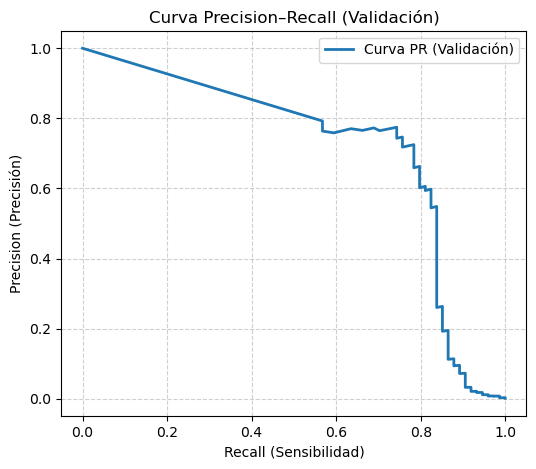

In [104]:
precision, recall, thresholds = precision_recall_curve(y_val_np, probs_val)

df_pr = pd.DataFrame({
    "threshold": np.append(thresholds, 1.0),  
    "precision": precision,
    "recall": recall,
})
df_pr["f1"] = 2 * (df_pr["precision"] * df_pr["recall"]) / (df_pr["precision"] + df_pr["recall"])
df_pr = df_pr.round(4)

print(df_pr.head(10))

print("\n— Métricas máximas —")
print("Max Precision:", df_pr["precision"].max())
print("Max Recall:", df_pr["recall"].max())
print("Max F1:", df_pr["f1"].max())

plt.figure(figsize=(6, 5))
plt.plot(recall, precision, label="Curva PR (Validación)", lw=2)
plt.xlabel("Recall (Sensibilidad)")
plt.ylabel("Precision (Precisión)")
plt.title("Curva Precision–Recall (Validación)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


### 2.3.3 Selección del umbral óptimo

In [105]:
best_f1_idx = df_pr["f1"].idxmax()
best_f1_row = df_pr.loc[best_f1_idx]
best_thresh_f1 = best_f1_row["threshold"]

print("Umbral por máximo F1:")
print(best_f1_row)

df_recall85 = df_pr[df_pr["recall"] >= 0.85]
if not df_recall85.empty:
    best_thresh_recall85 = df_recall85.sort_values("precision", ascending=False).iloc[0]
    print("\nUmbral con recall ≥ 0.85 (max precision dentro del grupo):")
    print(best_thresh_recall85)
else:
    print("\nNo hay umbral con recall ≥ 0.85.")

df_prec20 = df_pr[df_pr["precision"] >= 0.20]
if not df_prec20.empty:
    best_thresh_prec20 = df_prec20.sort_values("recall", ascending=False).iloc[0]
    print("\nUmbral con precision ≥ 0.20 (max recall dentro del grupo):")
    print(best_thresh_prec20)
else:
    print("\nNo hay umbral con precision ≥ 0.20.")


Umbral por máximo F1:
threshold    1.0000
precision    0.7746
recall       0.7432
f1           0.7586
Name: 42566, dtype: float64

Umbral con recall ≥ 0.85 (max precision dentro del grupo):
threshold    0.8001
precision    0.2636
recall       0.8514
f1           0.4026
Name: 42398, dtype: float64

Umbral con precision ≥ 0.20 (max recall dentro del grupo):
threshold    0.7342
precision    0.2000
recall       0.8514
f1           0.3239
Name: 42322, dtype: float64


### 2.3.4 Verificación del umbral elegido y evaluación visual

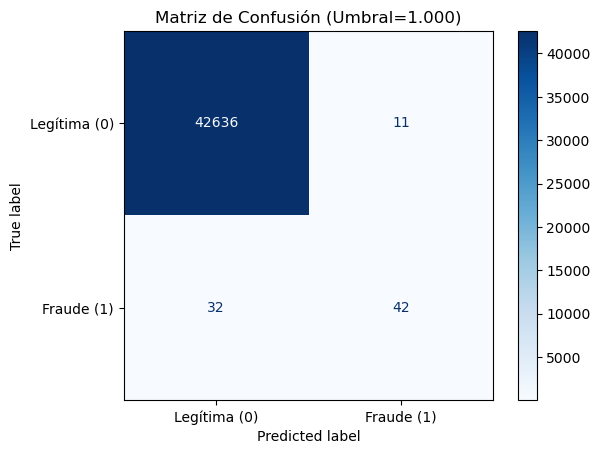

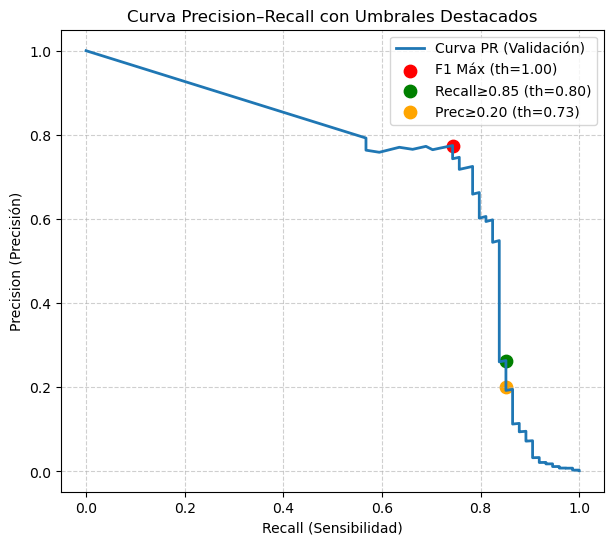

In [106]:
chosen_thresh = best_thresh_f1

y_pred_val = (probs_val >= chosen_thresh).astype(int)

cm = confusion_matrix(y_val_np, y_pred_val)
disp = ConfusionMatrixDisplay(cm, display_labels=["Legítima (0)", "Fraude (1)"])
disp.plot(cmap="Blues")
plt.title(f"Matriz de Confusión (Umbral={chosen_thresh:.3f})")
plt.show()

plt.figure(figsize=(7,6))
plt.plot(recall, precision, label="Curva PR (Validación)", lw=2)
plt.xlabel("Recall (Sensibilidad)")
plt.ylabel("Precision (Precisión)")
plt.title("Curva Precision–Recall con Umbrales Destacados")
plt.grid(True, linestyle="--", alpha=0.6)

plt.scatter(best_f1_row["recall"], best_f1_row["precision"], color="red", s=80, label=f"F1 Máx (th={best_thresh_f1:.2f})")
plt.scatter(best_thresh_recall85["recall"], best_thresh_recall85["precision"], color="green", s=80, label=f"Recall≥0.85 (th={best_thresh_recall85['threshold']:.2f})")
plt.scatter(best_thresh_prec20["recall"], best_thresh_prec20["precision"], color="orange", s=80, label=f"Prec≥0.20 (th={best_thresh_prec20['threshold']:.2f})")

plt.legend()
plt.show()

### 2.3.5 Evaluación final en TEST

Métricas en TEST (Umbral=1.000)
ROC-AUC : 0.9754
PR-AUC  : 0.7581
Precision : 0.9070
Recall    : 0.5270
F1-score  : 0.6667


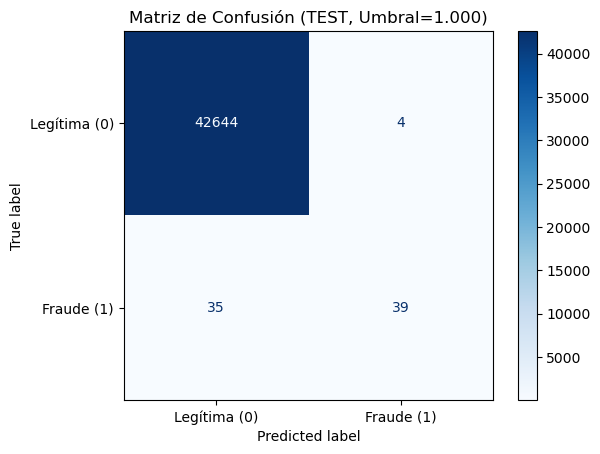

In [107]:
probs_test, y_test_np = get_probs_and_labels(model, test_loader, DEVICE)

y_pred_test = (probs_test >= best_thresh_f1).astype(int)

roc_test = roc_auc_score(y_test_np, probs_test)
pr_test = average_precision_score(y_test_np, probs_test)
prec, rec, f1, _ = precision_recall_fscore_support(
    y_test_np, y_pred_test, average="binary", zero_division=0
)
print(f"Métricas en TEST (Umbral={best_thresh_f1:.3f})")
print(f"ROC-AUC : {roc_test:.4f}")
print(f"PR-AUC  : {pr_test:.4f}")
print(f"Precision : {prec:.4f}")
print(f"Recall    : {rec:.4f}")
print(f"F1-score  : {f1:.4f}")

cm_test = confusion_matrix(y_test_np, y_pred_test)
disp = ConfusionMatrixDisplay(cm_test, display_labels=["Legítima (0)", "Fraude (1)"])
disp.plot(cmap="Blues")
plt.title(f"Matriz de Confusión (TEST, Umbral={best_thresh_f1:.3f})")
plt.show()


## Parte 3 Explicabilidad y visualización del espacio latente
Aplicaremos SHAP sobre las representaciones internas (embeddings latentes) del modelo para cuantificar la contribución de cada activación al resultado de fraude.
Luego usaremos UMAP para visualizar la estructura del espacio latente, coloreando por valores SHAP o etiquetas, revelando patrones interpretables dentro del modelo

In [108]:
print("Shapes latentes:")
print("  Train:", Z_train.shape)
print("  Val  :", Z_val.shape)
print("  Test :", Z_test.shape)

print("\nRango de activaciones (train):")
print(f"  min={Z_train.min():.4f}  max={Z_train.max():.4f}")

m_lat = np.round(Z_train.mean(axis=0), 4)
s_lat = np.round(Z_train.std(axis=0),  4)
print("\nMedia por dimensión (primeras 5):", m_lat[:5])
print("Desvío por dimensión (primeras 5):", s_lat[:5])

q = np.quantile(p_val, [0.5, 0.9, 0.95, 0.99])
print("\nPercentiles de probabilidad val (50/90/95/99%):", np.round(q, 4))

Shapes latentes:
  Train: (199364, 16)
  Val  : (42721, 16)
  Test : (42722, 16)

Rango de activaciones (train):
  min=0.0000  max=48.9430

Media por dimensión (primeras 5): [2.8772 2.6671 3.5173 0.1823 0.0854]
Desvío por dimensión (primeras 5): [1.2353 1.1237 1.5284 0.836  0.6372]

Percentiles de probabilidad val (50/90/95/99%): [0.0052 0.0806 0.182  0.6566]


### 3.2 Shap sobre espacio latente

In [109]:
import shap

class LatentHead(nn.Module):
    """Mapea z_latente -> logit usando solo el head entrenado."""
    def __init__(self, head_layer: nn.Linear):
        super().__init__()
        self.head = nn.Linear(head_layer.in_features, head_layer.out_features, bias=True)
        self.head.load_state_dict(head_layer.state_dict())
        self.head.eval()

    def forward(self, z):
        return self.head(z)  

latent_dim = model.head.in_features
head_model = LatentHead(model.head).to(DEVICE).eval()

In [ ]:
BG_N   = min(500,  Z_train.shape[0])      # background chico
EVAL_N = min(5000, Z_val.shape[0])        # explicar 5k puntos

rng = np.random.default_rng(SEED)
bg_idx   = rng.choice(Z_train.shape[0], size=BG_N,   replace=False)
eval_idx = rng.choice(Z_val.shape[0],   size=EVAL_N, replace=False)

bg_z   = torch.tensor(Z_train[bg_idx],  dtype=torch.float32, device=DEVICE)
eval_z = torch.tensor(Z_val[eval_idx],  dtype=torch.float32, device=DEVICE)

explainer = shap.DeepExplainer(head_model, bg_z)
shap_vals_raw = explainer.shap_values(eval_z)  # puede ser list / ndarray / tensor


def to_numpy_shap(x):
    # 1) si es lista de una salida, tomar el primer elemento
    if isinstance(x, list):
        x = x[0]
    # 2) si es tensor → pasar a numpy; si ya es numpy → asarray
    if torch.is_tensor(x):
        arr = x.detach().cpu().numpy()
    else:
        arr = np.asarray(x)
    # 3) aplanar (N, 1, D) -> (N, D) o cualquier forma rara -> (N, -1)
    if arr.ndim == 3 and arr.shape[1] == 1:
        arr = arr[:, 0, :]
    elif arr.ndim != 2:
        arr = arr.reshape(arr.shape[0], -1)
    return arr

shap_vals = to_numpy_shap(shap_vals_raw)          # (EVAL_N, latent_dim)
cols      = [f"L{i+1}" for i in range(shap_vals.shape[1])]

print("shap_vals (rápido) shape:", shap_vals.shape)

shap_vals (rápido) shape: (5000, 16)


Top-10 dimensiones latentes por |SHAP|:


,latent_dim,mean_abs_shap,mean_signed_shap
0,L16,0.338733,-0.007057
1,L3,0.294006,-0.004450
2,L14,0.264884,-0.004686
3,L1,0.250210,-0.005258
4,L7,0.227250,-0.002463
5,L2,0.221888,0.005507
6,L10,0.095798,-0.002518
7,L11,0.075870,0.005795
8,L4,0.072124,0.004668
9,L12,0.051413,0.001696


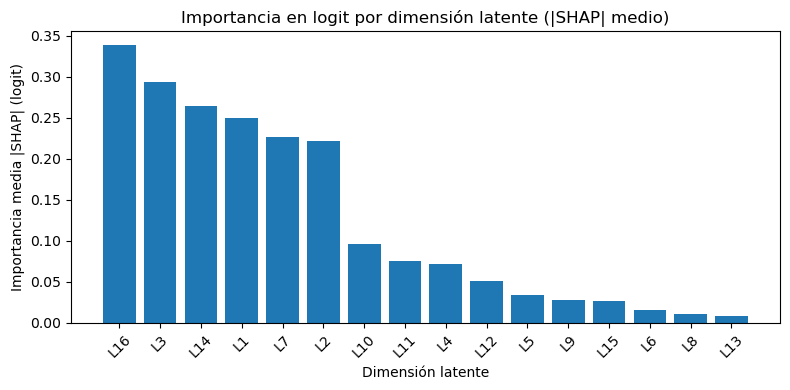

In [111]:
# 3.2.3 — Agregación e importancia

mean_abs = np.mean(np.abs(shap_vals), axis=0)           # [latent_dim]
sign_mean = np.mean(shap_vals, axis=0)                  # signo promedio (tendencia a subir/bajar logit)
cols = [f"L{i+1}" for i in range(shap_vals.shape[1])]

imp_df = pd.DataFrame({
    "latent_dim": cols,
    "mean_abs_shap": mean_abs,
    "mean_signed_shap": sign_mean
}).sort_values("mean_abs_shap", ascending=False).reset_index(drop=True)

print("Top-10 dimensiones latentes por |SHAP|:")
display(imp_df.head(10))

# Barra con matplotlib (simple, reproducible)
plt.figure(figsize=(8,4))
order = np.argsort(-mean_abs)
plt.bar(np.array(cols)[order], mean_abs[order])
plt.title("Importancia en logit por dimensión latente (|SHAP| medio)")
plt.ylabel("Importancia media |SHAP| (logit)")
plt.xlabel("Dimensión latente")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


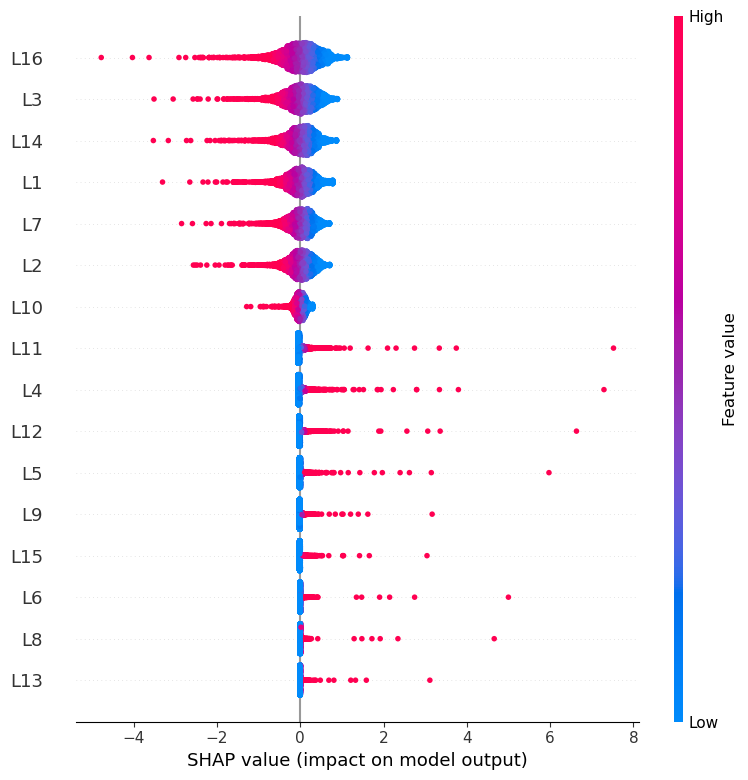

In [112]:
# 3.2.4 — (Opcional) Summary plot estilo SHAP
# Nota: estos plots usan matplotlib internamente, pero son propios de shap.
shap.summary_plot(
    shap_vals, Z_val[eval_idx], feature_names=cols, plot_type="dot", show=True
)


In [113]:
latent_names = [f"L{i+1}" for i in range(Z_val.shape[1])]
original_names = list(X.columns)  # tus features originales (V1...V28, Time, Amount)

corr = pd.DataFrame(np.corrcoef(Z_val.T, X_val_scaled.T)[:Z_val.shape[1], Z_val.shape[1]:],
                    index=latent_names, columns=original_names)

# Top-3 correlaciones por latente
for li in latent_names:
    print(f"\n{li}:")
    print(corr.loc[li].abs().sort_values(ascending=False).head(3))


L1:
V4     0.547826
V1     0.406255
V10    0.254411
Name: L1, dtype: float64

L2:
V4     0.571876
V1     0.458529
V10    0.189371
Name: L2, dtype: float64

L3:
V4     0.638533
V1     0.416861
V14    0.221124
Name: L3, dtype: float64

L4:
V14    0.370038
V12    0.341588
V17    0.310941
Name: L4, dtype: float64

L5:
V17    0.390112
V12    0.374523
V14    0.351707
Name: L5, dtype: float64

L6:
V17    0.454157
V12    0.384034
V14    0.357623
Name: L6, dtype: float64

L7:
V4      0.590572
V1      0.405690
Time    0.278297
Name: L7, dtype: float64

L8:
V17    0.468517
V12    0.363691
V14    0.352566
Name: L8, dtype: float64

L9:
V14    0.434065
V12    0.330026
V7     0.306202
Name: L9, dtype: float64

L10:
V4     0.536703
V1     0.317716
V10    0.301650
Name: L10, dtype: float64

L11:
V14    0.378307
V12    0.361651
V4     0.328785
Name: L11, dtype: float64

L12:
V14    0.364884
V12    0.338427
V17    0.331704
Name: L12, dtype: float64

L13:
V17    0.479519
V12    0.339510
V14    0.324648
N